In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from scipy import stats
from collections import Counter
from matplotlib import style
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import sqlite3
from sqlalchemy import create_engine, text
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("Resources/alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


---
### Data cleaning and preparation process 


In [4]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [5]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [6]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [7]:
# Drop irrelevant columns
alzheimer_df = alzheimer_df.drop(['DoctorInCharge'],axis=1)
alzheimer_df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [8]:
# Check for missing values
alzheimer_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [9]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [10]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2


### Plot a diagonal correlation matrix using seaborn heatmap

In [11]:
# Calculate the correlation matrix
corr_matrix = alzheimer_df.corr()

In [12]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

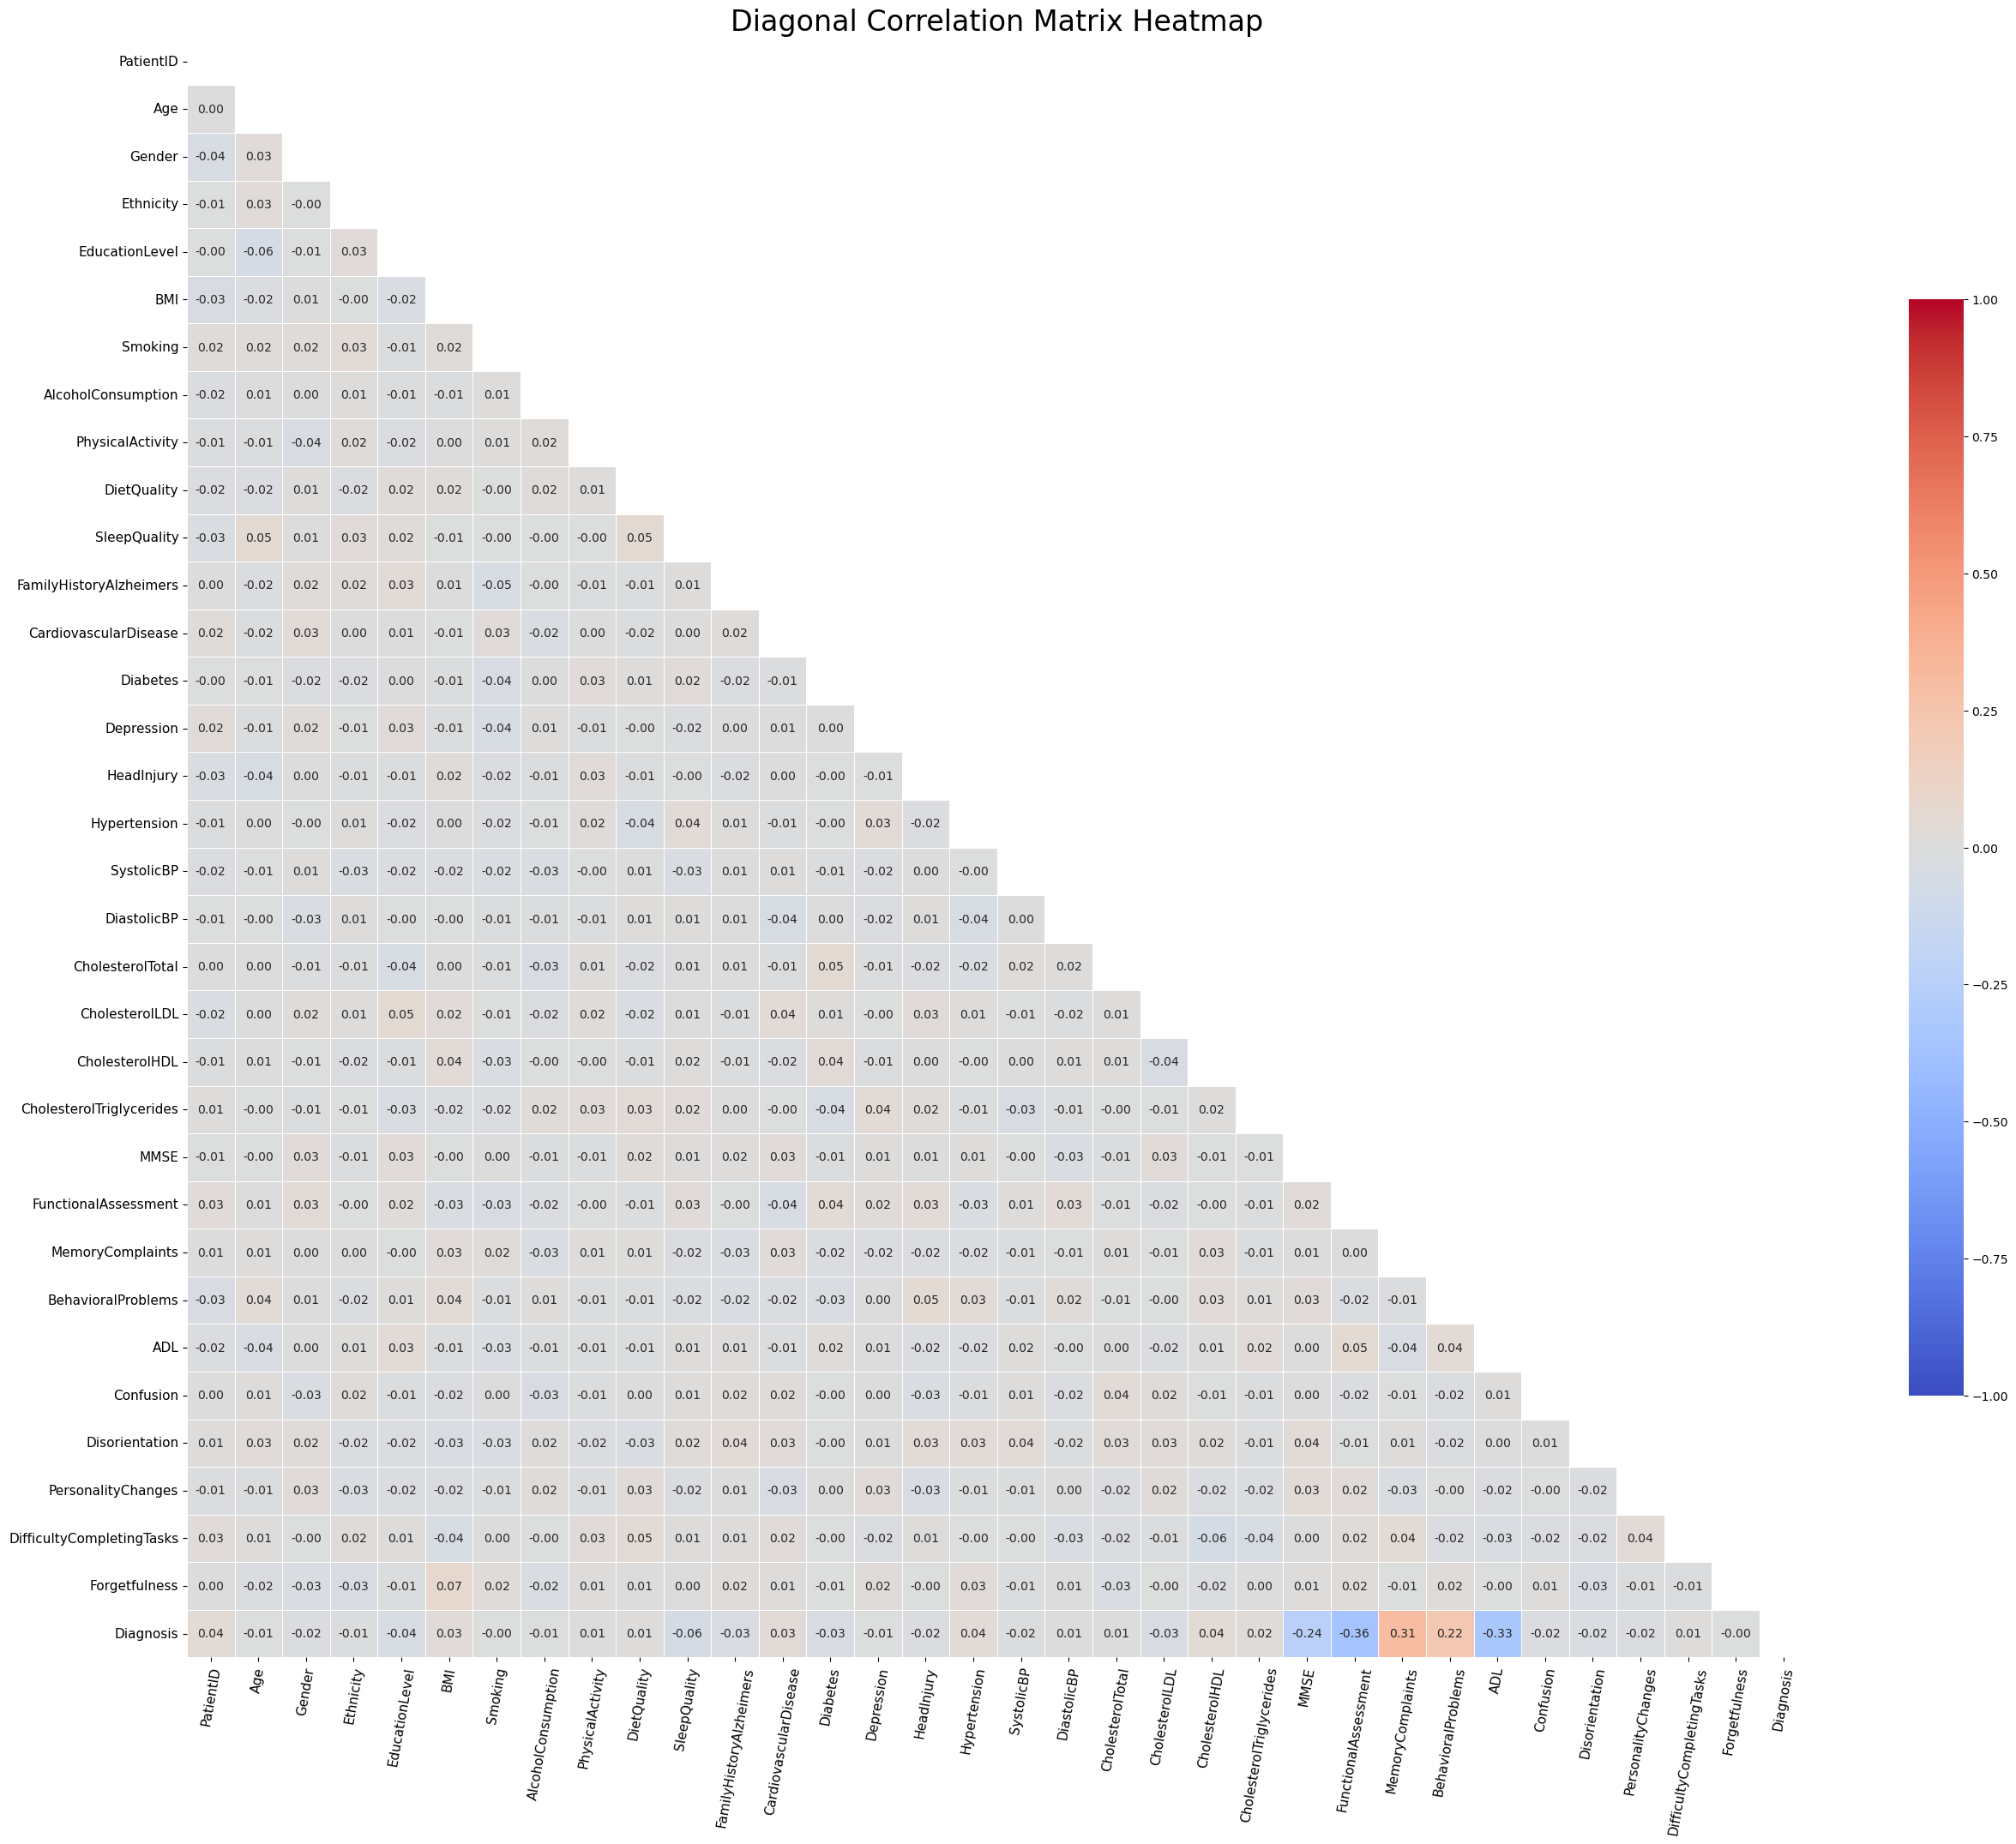

In [13]:
# Plot correlation matrix for all features
plt.figure(figsize=(26, 26))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Diagonal Correlation Matrix Heatmap', fontsize=24)
plt.xticks(fontsize=11, rotation=80)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('Diagonal Correlation Matrix Heatmap.png')
plt.show()

In [14]:
print('\nMemoryCompliants and BehavoralProblems showed a weak positive correlation with Alzheimer\'s diagnosis.\n'
      '\nMMSE(Mini-Mental State Examination score), FunctionalAssessment and ADL(Activities of Daily Living) showed a weak negative correlation.\n'
      '\nThe rest of the variables showed no correlation with diagnosis.\n')


MemoryCompliants and BehavoralProblems showed a weak positive correlation with Alzheimer's diagnosis.

MMSE(Mini-Mental State Examination score), FunctionalAssessment and ADL(Activities of Daily Living) showed a weak negative correlation.

The rest of the variables showed no correlation with diagnosis.



---
### Exploratory Data Analysis (EDA)



In [15]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [16]:
# keep only columns of "Ethinicity", "Gender", , "Age", and "EducationLevel"
alzheimer_clean_df = alzheimer_df[['Diagnosis', 'Ethnicity', 'Gender','Age', 'EducationLevel']]
alzheimer_clean_df

,Diagnosis,Ethnicity,Gender,Age,EducationLevel
0,0,0,0,73,2
1,0,0,0,89,0
2,0,3,0,73,1
3,0,0,1,74,1
4,0,0,0,89,0
...,...,...,...,...,...
2144,1,0,0,61,1
2145,1,0,0,75,2
2146,1,0,0,77,1
2147,1,3,1,78,1


### Data Visualization

In [17]:
# Copy alzheimer_clean_df 
alzheimer_EGAE_df = alzheimer_clean_df.copy()

In [18]:
# Replace the code with following expression:
diagnosis_map = {0: "No", 1: "Yes"}
gender_map = {0: "Male", 1: "Female"}
ethnicity_map = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
education_map = {0: "None", 1: "High School", 2:"Bachelor's", 3:"Higher"}
memory_map = {0: "No", 1: "Yes"}
behavioral_map = {0: "No", 1: "Yes"}

alzheimer_EGAE_df['Diagnosis'] = alzheimer_EGAE_df['Diagnosis'].map(diagnosis_map)
alzheimer_EGAE_df['Gender'] = alzheimer_EGAE_df['Gender'].map(gender_map)
alzheimer_EGAE_df['Ethnicity'] = alzheimer_EGAE_df['Ethnicity'].map(ethnicity_map)
alzheimer_EGAE_df['EducationLevel'] = alzheimer_EGAE_df['EducationLevel'].map(education_map)
alzheimer_EGAE_df

,Diagnosis,Ethnicity,Gender,Age,EducationLevel
0,No,Caucasian,Male,73,Bachelor's
1,No,Caucasian,Male,89,None
2,No,Other,Male,73,High School
3,No,Caucasian,Female,74,High School
4,No,Caucasian,Male,89,None
...,...,...,...,...,...
2144,Yes,Caucasian,Male,61,High School
2145,Yes,Caucasian,Male,75,Bachelor's
2146,Yes,Caucasian,Male,77,High School
2147,Yes,Other,Female,78,High School


In [19]:
# Save the dataframe to a CSV file
alzheimer_EGAE_df.to_csv('Resources/alzheimer_EGAE_df.csv', index=False)

In [20]:
# Create a SQLite database engine
engine = create_engine('sqlite:///alzheimer_EGAE_data.db')

# Write the DataFrame to a SQL table
alzheimer_EGAE_df.to_sql('alzheimer_EGAE_data', engine, index=False, if_exists='replace')

# Generate SQL file
with engine.connect() as conn:
    with open('alzheimer_EGAE_data.sql', 'w') as f:
        result = conn.execute(text("SELECT * FROM alzheimer_EGAE_data"))
        for line in result.fetchall():
            f.write(f"INSERT INTO alzheimer_EGAE_data VALUES {line};\n")

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

### Age counts and ratio of alzheimer patients and non-patients

In [21]:
# Review staistics of "Age"
print(alzheimer_EGAE_df['Age'].describe())

count    2149.000000
mean       74.908795
std         8.990221
min        60.000000
25%        67.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64


In [22]:
# Check the count distriution of the Yes and No diagnosis
print(alzheimer_EGAE_df['Diagnosis'].value_counts())

Diagnosis
No     1389
Yes     760
Name: count, dtype: int64


In [23]:
# Caculate the ratio between AD patients and control participants
ad_count = alzheimer_EGAE_df['Diagnosis'].value_counts()[1]
control_count = alzheimer_EGAE_df['Diagnosis'].value_counts()[0]

avg_ratio = ad_count/control_count

print(avg_ratio)

0.5471562275017998


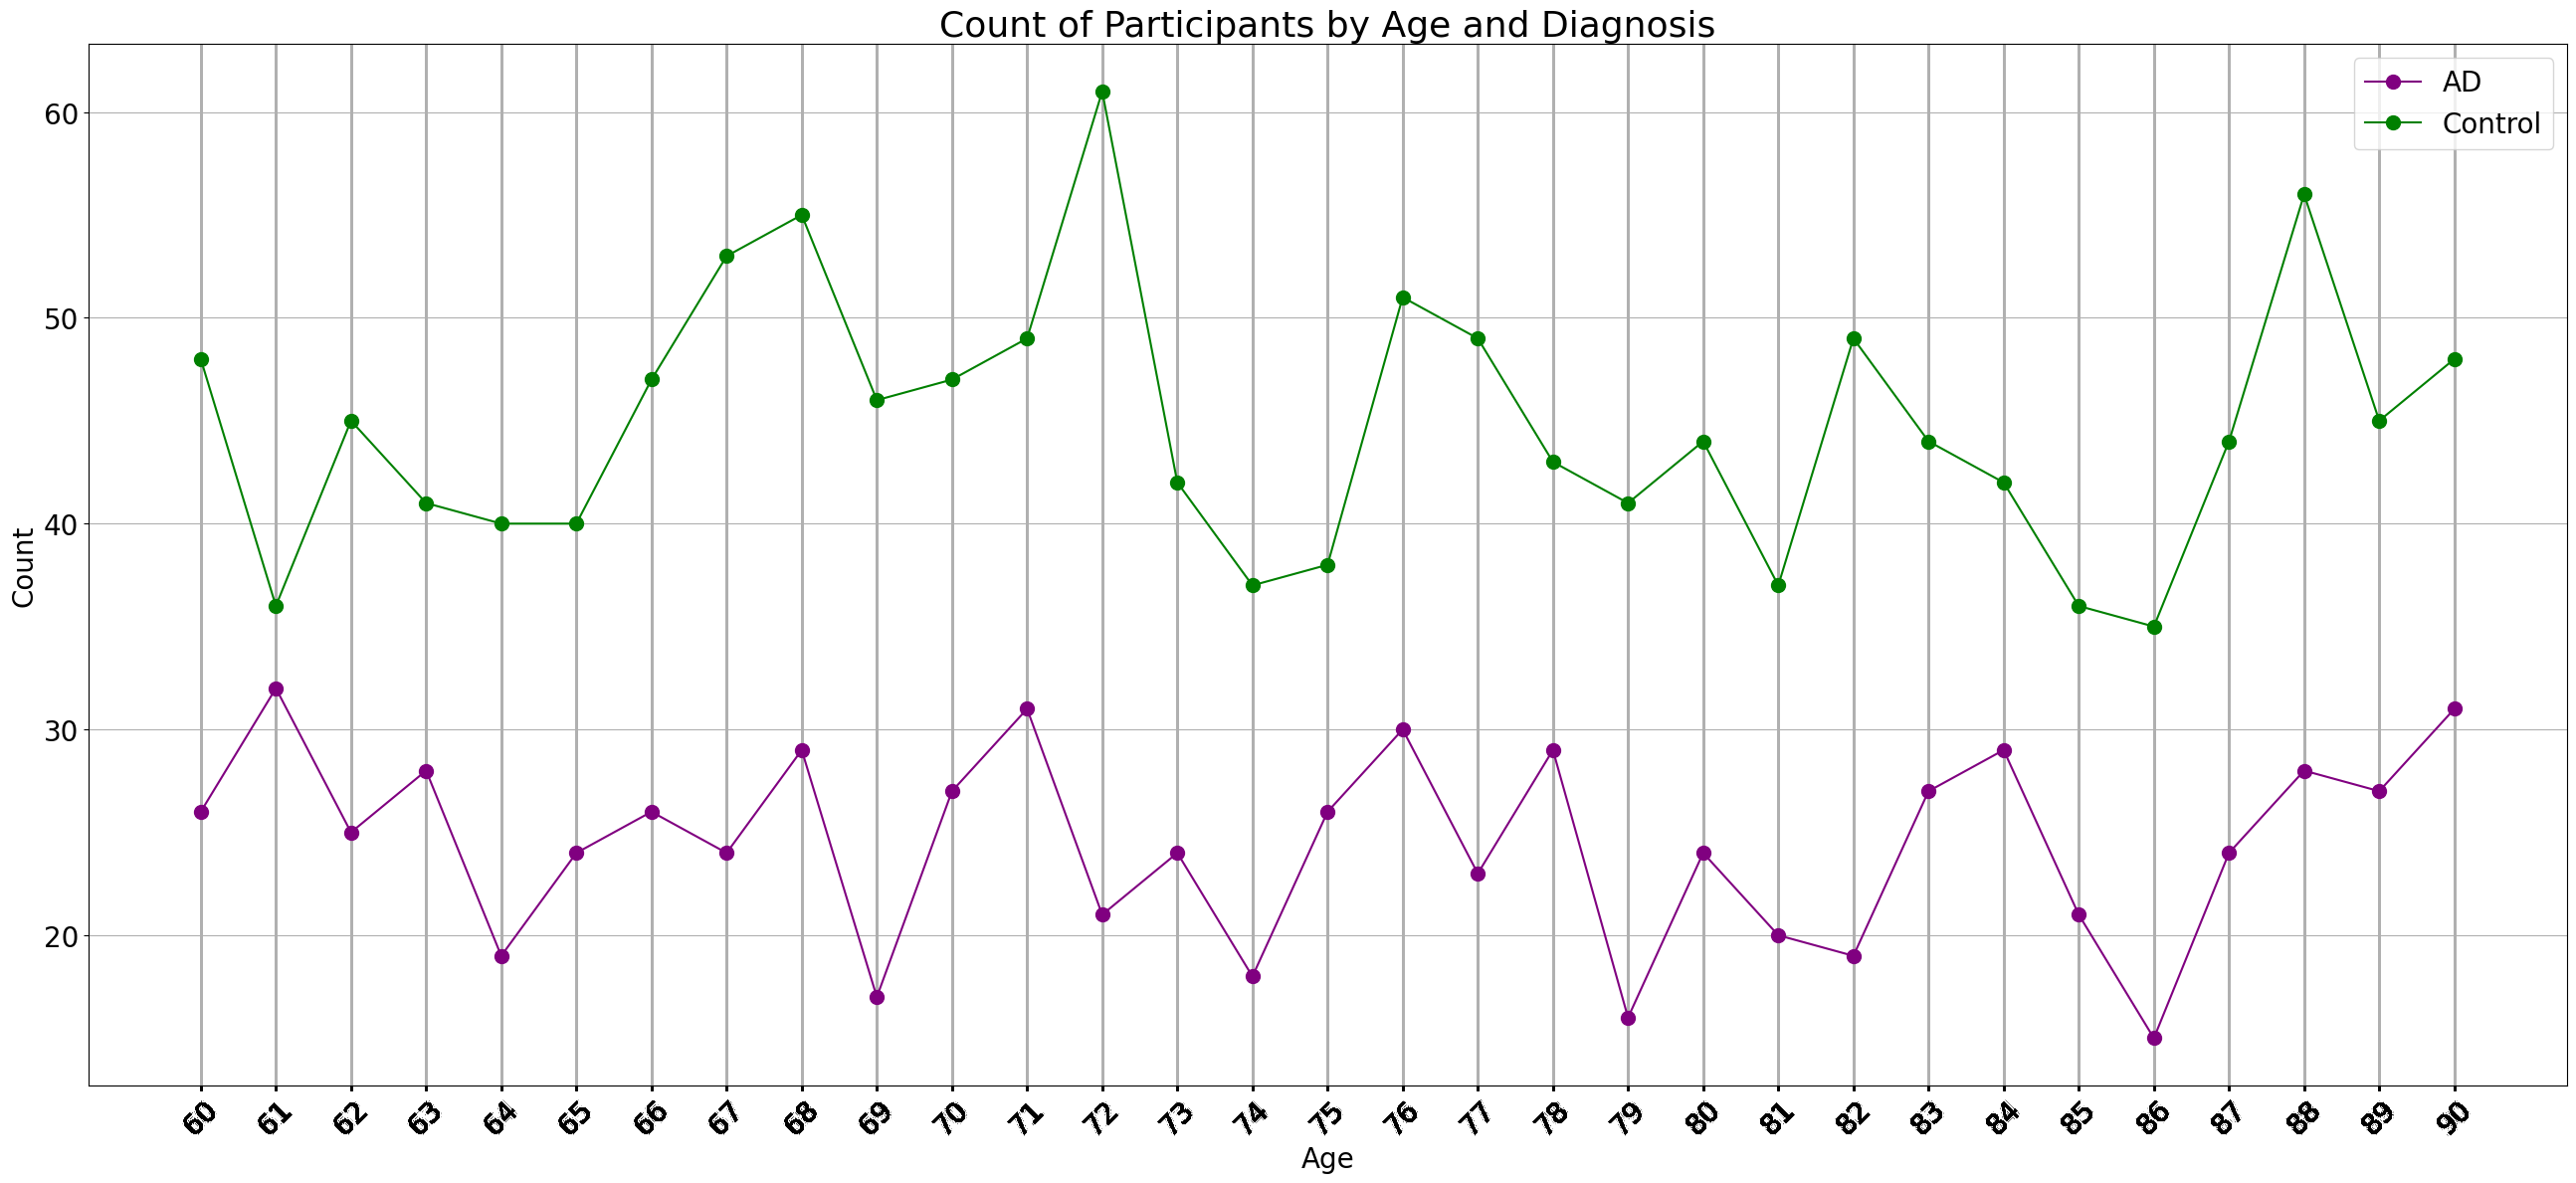

In [24]:
# Count the occurrences of each age for both groups
age_counts_ad = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='Yes']['Age'].value_counts().sort_index()
age_counts_control = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='No']['Age'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(26, 12))
plt.plot(age_counts_ad.index, age_counts_ad.values, label='AD', color='purple', marker='o', markersize=10)
plt.plot(age_counts_control.index, age_counts_control.values, label='Control', color='green', marker='o', markersize=10)

plt.title('Count of Participants by Age and Diagnosis', fontsize=26)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(alzheimer_EGAE_df['Age'],fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)

plt.tight_layout()
plt.savefig('age_counts_by_diagnosis.png', dpi=300)
plt.show()

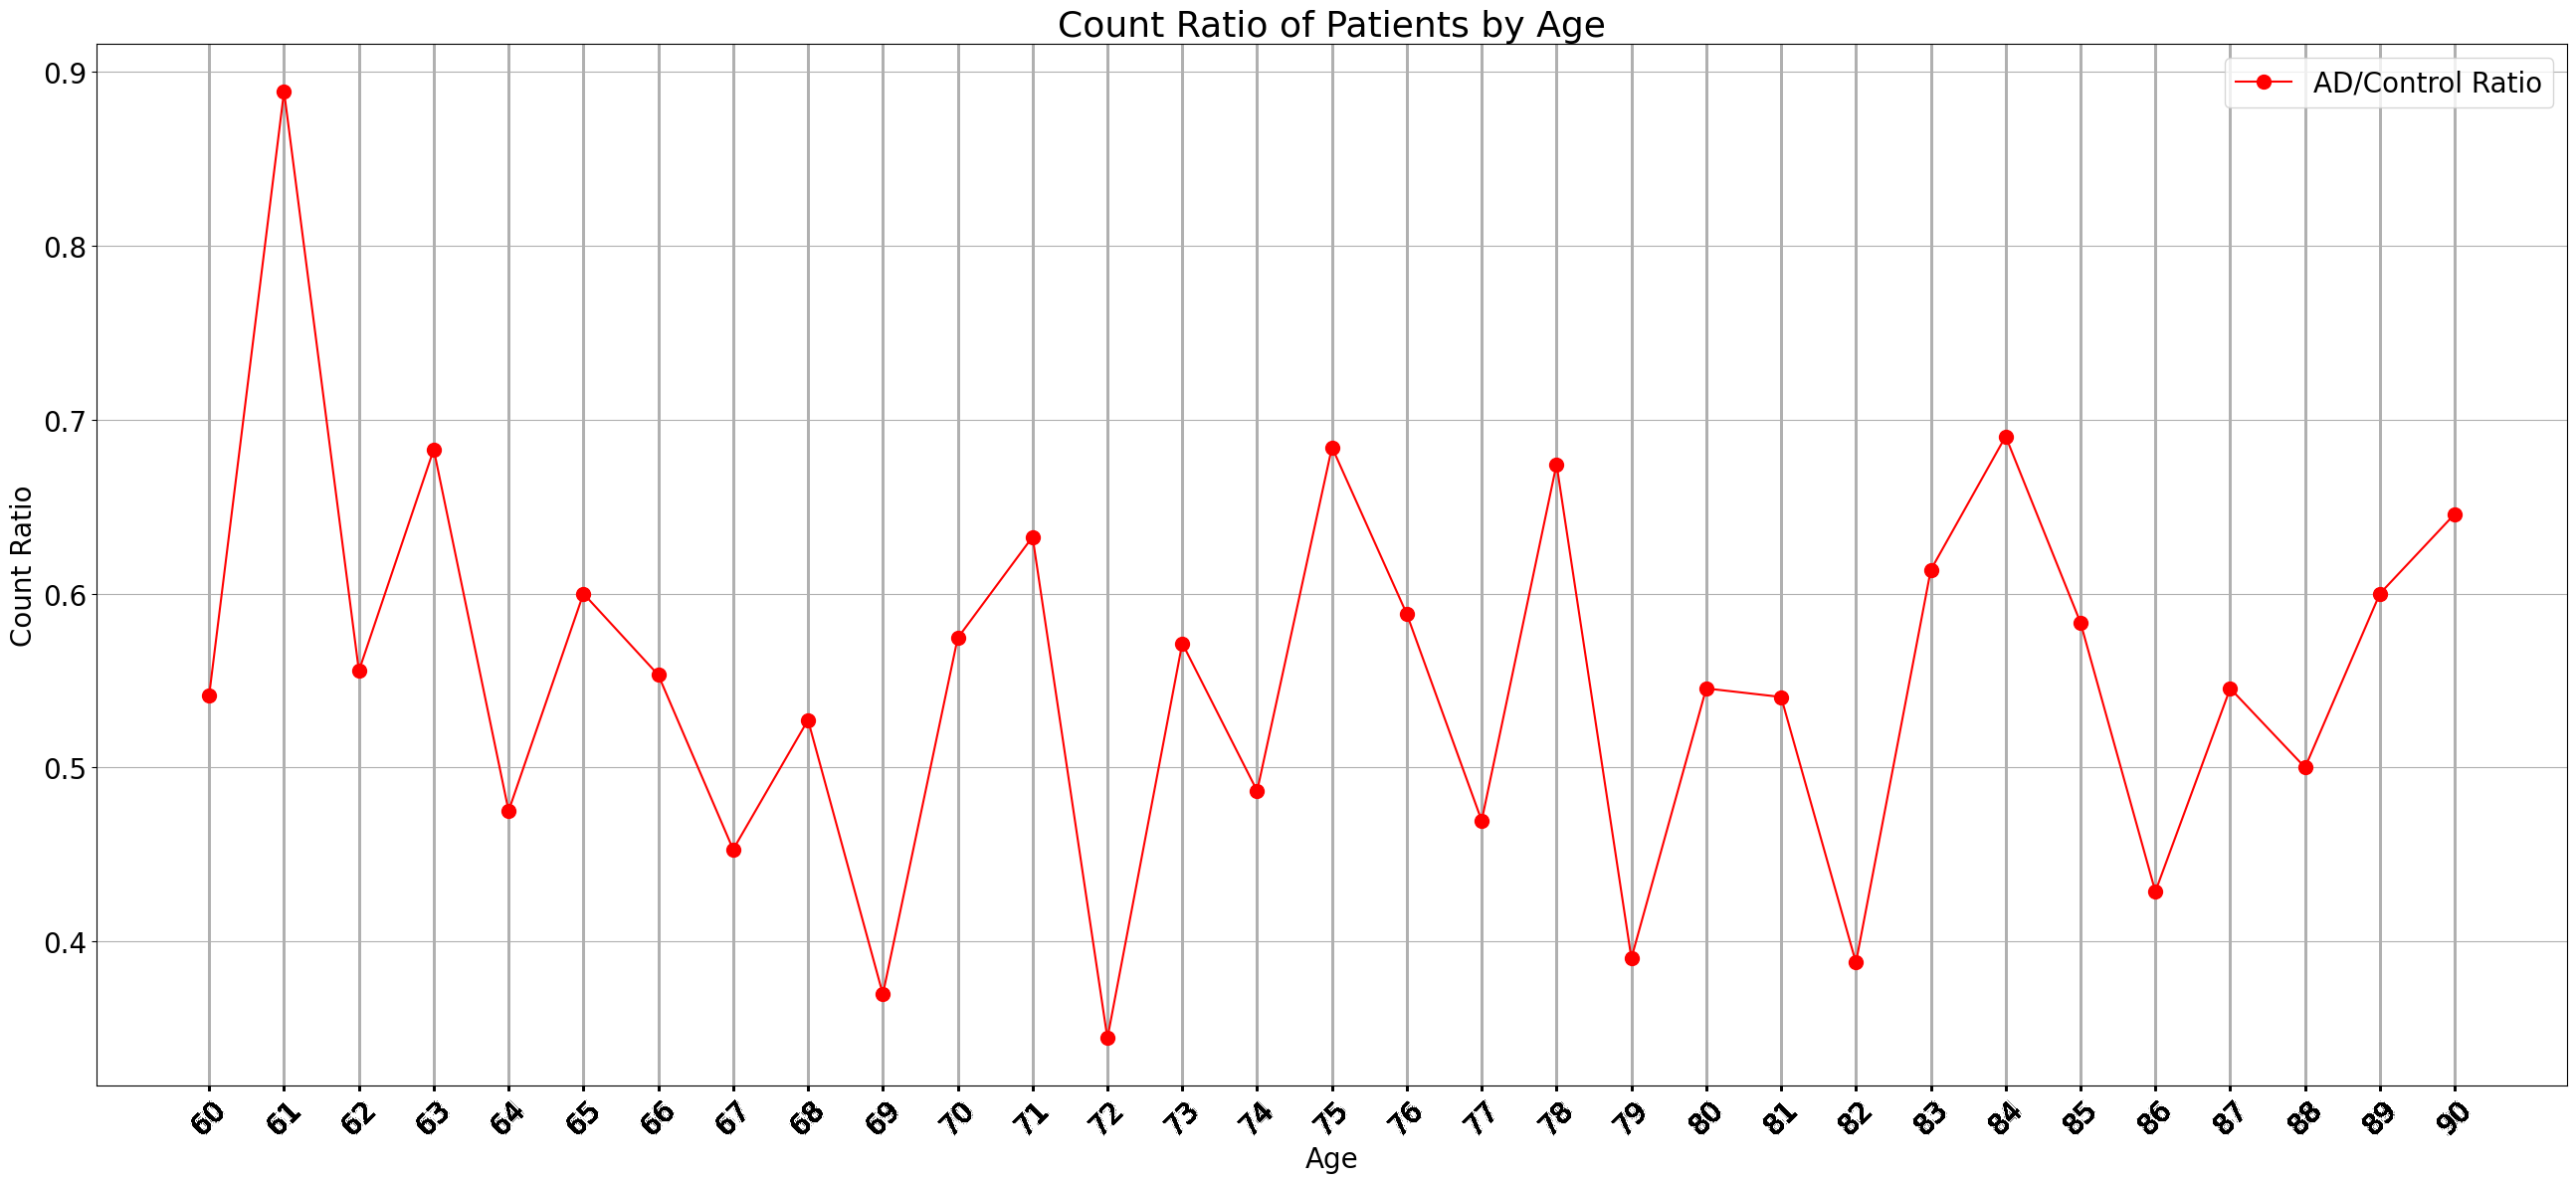

In [25]:
# Calculate the ratio between patients count and non-patients count at each age
age_count_ratio = age_counts_ad/age_counts_control

# Create the plot
plt.figure(figsize=(26, 12))
plt.plot(age_count_ratio.index, age_count_ratio.values, label='AD/Control Ratio', color='red', marker='o', markersize=10)

# Customize the plot
plt.title('Count Ratio of Patients by Age', fontsize=26)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count Ratio', fontsize=20)
plt.xticks(alzheimer_EGAE_df['Age'], fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig('age_count_ratio.png', dpi=300)
plt.show()

In [26]:
# Calculate ratio difference between AD count ratio at each age and the average AD count ratio within all paticipants
ratio_diff = age_count_ratio - avg_ratio

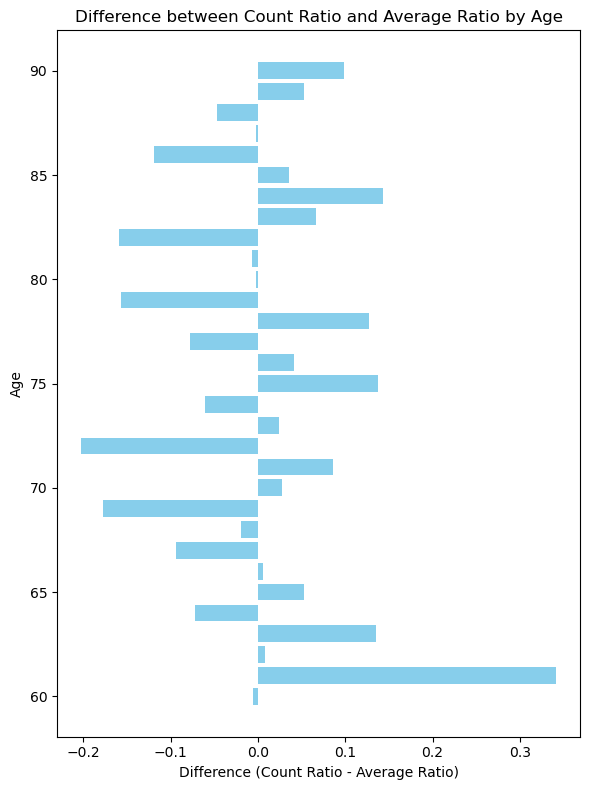

In [27]:
# Create a bar plot
plt.figure(figsize=(6, 8))
plt.barh(ratio_diff.index, ratio_diff.values, color='skyblue')
plt.title('Difference between Count Ratio and Average Ratio by Age')
plt.xlabel('Difference (Count Ratio - Average Ratio)')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('diff_ratio_age.png')
plt.show()

In [28]:
# Create a dashboard to demonstrate the ratio difference 
# Create data frame 
age_sorted = sorted(alzheimer_EGAE_df['Age'].unique(), reverse=False)
ratio_diff_df = pd.DataFrame({
    'Difference': ratio_diff,
    'Age': age_sorted,
    })
ratio_diff_df.reset_index(drop=True, inplace=True)
ratio_diff_df.head()

,Difference,Age
0,-0.005490,60
1,0.341733,61
2,0.008399,62
3,0.135771,63
4,-0.072156,64


In [29]:
# Create a dashboard using Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Ratio Difference Dashboard"),
    dcc.Dropdown(
        id='age-dropdown',
        options=[{'label': str(age), 'value': age} for age in ratio_diff_df['Age'].unique()],
        value=ratio_diff_df['Age'].min(),
        style={'width': '50%'}
    ),
    dcc.Graph(id='ratio-difference-graph')
])

@app.callback(
    Output('ratio-difference-graph', 'figure'),
    Input('age-dropdown', 'value')
)
def update_graph(selected_age):
    filtered_df = ratio_diff_df[ratio_diff_df['Age'] == selected_age]
    
    trace = go.Bar(
        x=['Difference'],
        y=[filtered_df['Difference'].values[0]],
        marker=dict(color=['orange']),
    )
    
    layout = go.Layout(
        title=f'Ratio Comparison for Age {selected_age}',
        yaxis=dict(title='Ratio Difference', range=[ratio_diff_df['Difference'].min(), ratio_diff_df['Difference'].max()]),
        height=400,
        width=270
    )
    
    return {'data': [trace], 'layout': layout}

if __name__ == '__main__':
    app.run_server(debug=True)

In [30]:
print(f"The patient ratio difference ranged from {ratio_diff.min():0.2f} to {ratio_diff.max():0.2f}.The highest patient ratio was at the age of 61")

The patient ratio difference ranged from -0.20 to 0.34.The highest patient ratio was at the age of 61


In [31]:
# Statistcal analysis
diff = age_count_ratio - avg_ratio
mean_difference = np.mean(diff)
median_difference = np.median(diff)
std_difference = np.std(diff)

In [32]:
# Perform a t-test to see if the difference is statistically significant from zero
t_statistic, p_value = stats.ttest_1samp(diff, 0)

In [33]:
# Print the results
print(f"Mean difference: {mean_difference:.4f}")
print(f"Median difference: {median_difference:.4f}")
print(f"Standard deviation of difference: {std_difference:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Mean difference: 0.0059
Median difference: 0.0060
Standard deviation of difference: 0.1114
T-statistic: 0.2886
P-value: 0.7749


In [34]:
print("There is no significant difference due to p-value is greater than 0.05")

There is no significant difference due to p-value is greater than 0.05


### Gender distribution of Alzheimer's patients

In [35]:
# Review value counts of gender for all participants
alzheimer_EGAE_df['Gender'].value_counts()

Gender
Female    1088
Male      1061
Name: count, dtype: int64

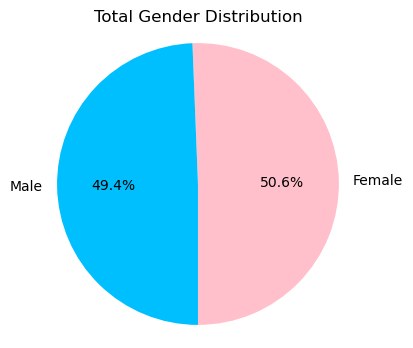

In [36]:
# Count the patient and non-patient of each gender
gender_counts = alzheimer_EGAE_df['Gender'].value_counts()
# Calulate the percentage of each gender
gender_percentages = gender_counts / len(alzheimer_EGAE_df) * 100

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%",startangle=270, colors=["#FFC0CB", "#00BFFF"])
plt.title('Total Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('gender_pie_chart.png')
plt.show()

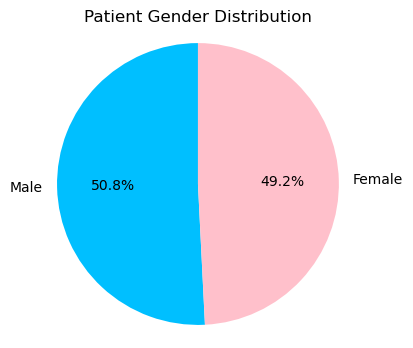

In [37]:
# Calulate the gender distribution in patients group 
gender_counts_ad = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='Yes']['Gender'].value_counts()

# Calulate the percentage of each gender
gender_percentages_ad = gender_counts_ad / ad_count * 100

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts_ad.values, labels=gender_counts_ad.index, autopct="%1.1f%%",startangle=90, colors=["#00BFFF", "#FFC0CB"])
plt.title('Patient Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('gender_distribution_ad.png')
plt.show()


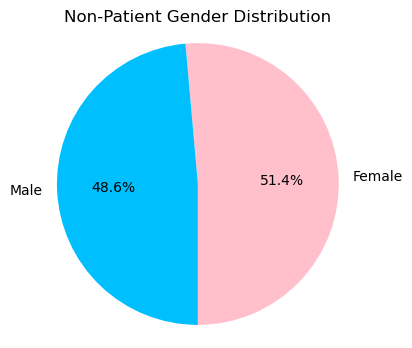

In [38]:
# Calulate the gender distribution in non-patients group 
gender_counts_control = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='No']['Gender'].value_counts()
# Calulate the percentage of each gender
gender_percentages_control = gender_counts_control / control_count * 100

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_counts_control.values, labels=gender_counts_control.index, autopct="%1.1f%%",startangle=270, colors=["#FFC0CB", "#00BFFF"])
plt.title('Non-Patient Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('gender_distribution_control.png')
plt.show()

### Ethnicity distribution of alzheimer patients

In [39]:
# Review value counts of Ethnicity
alzheimer_EGAE_df['Ethnicity'].value_counts()

Ethnicity
Caucasian           1278
African American     454
Other                211
Asian                206
Name: count, dtype: int64

In [40]:
# Calculate the ethnicity proprtion of all participents
ethnicity_proportions = alzheimer_EGAE_df['Ethnicity'].value_counts(normalize=True)
print(ethnicity_proportions)

Ethnicity
Caucasian           0.594695
African American    0.211261
Other               0.098185
Asian               0.095859
Name: proportion, dtype: float64


In [41]:
# Filter the dataframe for AD patients
ad = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='Yes']
# Calculate the proportion of AD patients in each ethnicity group based on all patients
ethnicity_proportions_ad = ad['Ethnicity'].value_counts(normalize=True)

print(ethnicity_proportions_ad)

Ethnicity
Caucasian           0.609211
African American    0.192105
Asian               0.110526
Other               0.088158
Name: proportion, dtype: float64


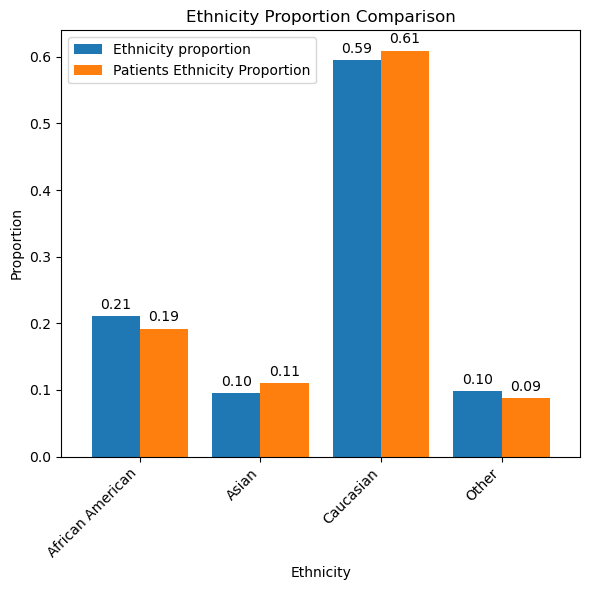

In [42]:
# Combine the two series into a DataFrame
ethnicity_prop_comparison = pd.DataFrame({
    'Ethnicity proportion': ethnicity_proportions,
    'Patients Ethnicity Proportion': ethnicity_proportions_ad
})

# Create the multi-bar plot
ax = ethnicity_prop_comparison.plot(kind='bar', figsize=(6, 6), width=0.8)

# Customize the plot
plt.title('Ethnicity Proportion Comparison')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('ethnicity_prop_comparison.png')
plt.show()

In [43]:
# Calculate the difference between AD patient proportion of ethinicity group and ethnicity proportion
ethn_prop_diff = ethnicity_proportions_ad - ethnicity_proportions
ethn_prop_diff

Ethnicity
African American   -0.019156
Asian               0.014668
Caucasian           0.014515
Other              -0.010027
Name: proportion, dtype: float64

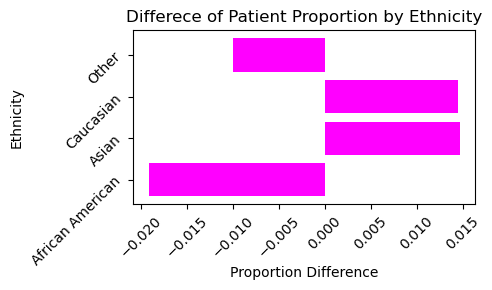

In [44]:
# Create the bar graph
plt.figure(figsize=(5, 3))
plt.barh(ethn_prop_diff.index, ethn_prop_diff.values, color='magenta')
plt.xlabel('Proportion Difference')
plt.ylabel('Ethnicity')
plt.title('Differece of Patient Proportion by Ethnicity')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('ethn_prop_diff.png')
plt.show()

In [45]:
print("The patient proptorion in groups of Caucasion and Asian is greater than the ethnicity proportion in the total population")

The patient proptorion in groups of Caucasion and Asian is greater than the ethnicity proportion in the total population


### Edcation distribution of Alzheimer's patients

In [46]:
# Review value counts for the 'EducationLevel' column
alzheimer_EGAE_df['EducationLevel'].value_counts()

EducationLevel
High School    854
Bachelor's     636
None           446
Higher         213
Name: count, dtype: int64

In [47]:
# Calculate the education level proprtion of all participents
EL_proportions = alzheimer_EGAE_df['EducationLevel'].value_counts(normalize=True)
print(EL_proportions)

EducationLevel
High School    0.397394
Bachelor's     0.295952
None           0.207538
Higher         0.099116
Name: proportion, dtype: float64


In [48]:
# Calculate the proportion of AD patients in each ethnicity group based on all patients
EL_proportions_ad = ad['EducationLevel'].value_counts(normalize=True)

print(EL_proportions_ad)

EducationLevel
High School    0.397368
Bachelor's     0.285526
None           0.228947
Higher         0.088158
Name: proportion, dtype: float64


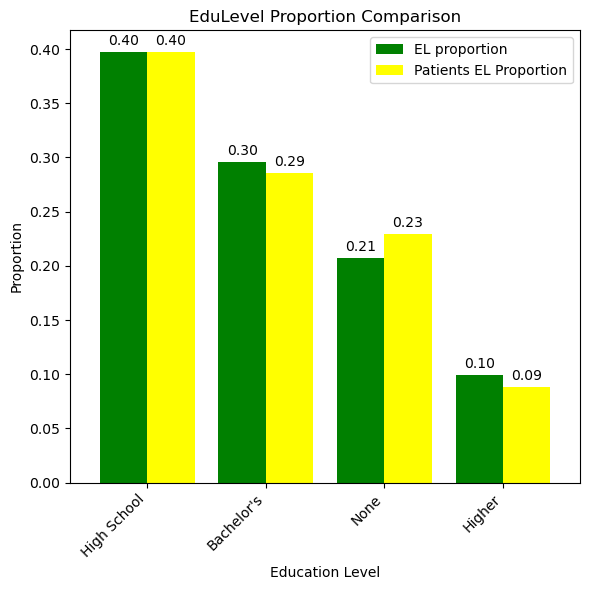

In [49]:
# Combine the two series into a DataFrame
EL_prop_comparison = pd.DataFrame({
    'EL proportion': EL_proportions,
    'Patients EL Proportion': EL_proportions_ad
})

# Create the multi-bar plot
ax = EL_prop_comparison.plot(kind='bar', figsize=(6, 6), width=0.8, color=['green', 'yellow'])

# Customize the plot
plt.title('EduLevel Proportion Comparison')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('EL_prop_comparison.png')
plt.show()

In [50]:
# Review value counts for the 'EducationLevel' column
alzheimer_EGAE_df['EducationLevel'].value_counts()

EducationLevel
High School    854
Bachelor's     636
None           446
Higher         213
Name: count, dtype: int64

In [51]:
# Calculate the difference between AD patient proportion of education level group and education level proportion
EL_prop_diff = EL_proportions_ad - EL_proportions
EL_prop_diff

EducationLevel
High School   -0.000026
Bachelor's    -0.010425
None           0.021409
Higher        -0.010958
Name: proportion, dtype: float64

In [52]:
# Create data frame 
EL_prop_diff_df = pd.DataFrame({'EL_prop_diff': EL_prop_diff})
EL_prop_diff_df.head()

,EL_prop_diff
EducationLevel,
High School,-0.000026
Bachelor's,-0.010425
None,0.021409
Higher,-0.010958


In [53]:
print("\nThe patient proportion in the group of non-educated is greater than the proportion of that group in total participants.\n" "\nThe patient proportion in the rest of three groups is less than the proportion of coresponding group in total participants.\n")


The patient proportion in the group of non-educated is greater than the proportion of that group in total participants.

The patient proportion in the rest of three groups is less than the proportion of coresponding group in total participants.



Data Analysis of MemoryComplaints and BehavioralProblems

In [54]:
# Based on the correlation matrix results, create a new dataframe that contains five correlated varables 
alzheimer_EGAE_opt_df = alzheimer_df[['Diagnosis', 'MemoryComplaints', 'BehavioralProblems', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL',]]
alzheimer_EGAE_opt_df.head()

,Diagnosis,MemoryComplaints,BehavioralProblems,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
0,0,0,0,21.463532,6.518877,0,0,1.725883
1,0,0,0,20.613267,7.118696,0,0,2.592424
2,0,0,0,7.356249,5.895077,0,0,7.119548
3,0,0,1,13.991127,8.965106,0,1,6.481226
4,0,0,0,13.517609,6.045039,0,0,0.014691


In [55]:
# Save the dataframe to a CSV file
alzheimer_EGAE_opt_df.to_csv('Resources/alzheimer_EGAE_opt__df.csv', index=False)